In [1]:
import input_image
import accuracyHistory

2023-05-19 08:56:38.548889: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 08:56:38.831177: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-19 08:56:38.831294: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-19 08:56:40.009451: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnv

In [2]:
def translate_kanji():
    print("Make sure you have placed your image in the input_images folder\n")
    input("Confirm that you have placed your image correctly")
    print("Your image is being recognized...\n")
    image_output_list = input_image.give_image_meaning()
    print(f"\nWe recognized your image as: {image_output_list[0]}\n")
    print("It translates to:")
    for item in image_output_list[1]:
        print(item)

In [3]:
def test_skills():
    print("Can you draw this kanji: ")
    print("Click on this link to see a better rendition: \n")
    
    print("Make sure you have placed your image in the input_images folder\n")
    input("Confirm that you have placed your image correctly")
    
    print("Your image is being recognized...\n")
    image_output_list = input_image.give_image_meaning()

    print(f'You drew {image_output_list[0]} with an accuracy of {image_output_list[2]}%')
    accuracyHistory.display_accuracy()

WELCOME TO KANJI RECOGNIZER :D´

What would you like to do?:
-Test your skills -> Type 1
-Get translation of a kanji symbol -> Type 2
(Type C to shut down)

You have chosen to test your skills

Can you draw this kanji: 
Click on this link to see a better rendition: 

Make sure you have placed your image in the input_images folder

Your image is being recognized...



2023-05-19 08:56:44.838297: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-19 08:56:44.838401: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-19 08:56:44.838430: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (108bb72cdfce): /proc/driver/nvidia/version does not exist
2023-05-19 08:56:44.838720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler fla

1/1 [==============================] - 0s 265ms/step
(0, 0, 'U+4C99', 27.397269010543823)
You drew 䲙 with an accuracy of 27.397269010543823%


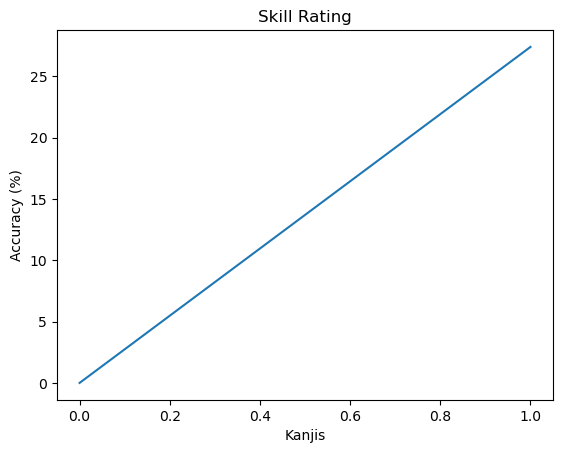

WELCOME TO KANJI RECOGNIZER :D´

What would you like to do?:
-Test your skills -> Type 1
-Get translation of a kanji symbol -> Type 2
(Type C to shut down)

SHUT DOWN


In [4]:

no_shutdown = True
while no_shutdown:
    print("WELCOME TO KANJI RECOGNIZER :D´\n")
    print("What would you like to do?:\n-Test your skills -> Type 1\n-Get translation of a kanji symbol -> Type 2\n(Type C to shut down)\n")
    choice = input("Type your choice here!")

    if (choice == "1"):
        print("You have chosen to test your skills\n")    
        test_skills()
        
    elif (choice == "2"):
        print("You have chosen to translate a kanji symbol\n")
        translate_kanji()
        
    elif (choice in ["c", "C"]):
        no_shutdown = False
        
    else:
        print("MAKE A CORRECT CHOICE")

print("SHUT DOWN")
